In [15]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('https://raw.githubusercontent.com/Pravignapala/Principle_of_Data_Science/refs/heads/main/Data.csv')

# If you want to remove leading/trailing whitespace from each column
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Print the DataFrame
print(df)

   Height   Weight   Age   Grip strength  Frailty
0    65.8      112    30              30        N
1    71.5      136    19              31        N
2    69.4      153    45              29        N
3    68.2      142    22              28        Y
4    67.8      144    29              24        Y
5    68.7      123    50              26        N
6    69.8      141    51              22        Y
7    70.1      136    23              20        Y
8    67.9      112    17              19        N
9    66.8      120    39              31        N


In [16]:
df.columns = df.columns.str.replace(' ', '')
print(df['Frailty'])

0    N
1    N
2    N
3    Y
4    Y
5    N
6    Y
7    Y
8    N
9    N
Name: Frailty, dtype: object


In [17]:
# Convert 'Frailty' to numerical (0/1)
df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})

# Standardize/Normalize numerical data (Height, Weight, Grip strength)
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Height', 'Weight', 'Gripstrength']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save the cleaned data
df.to_csv('frailty_data_cleaned.csv', index=False)

print(df.head())


     Height    Weight  Age  Gripstrength  Frailty
0 -1.766641 -1.473912   30      0.932505        0
1  1.829735  0.303670   19      1.165631        0
2  0.504754  1.562791   45      0.699379        0
3 -0.252377  0.748066   22      0.466252        1
4 -0.504754  0.896198   29     -0.466252        1


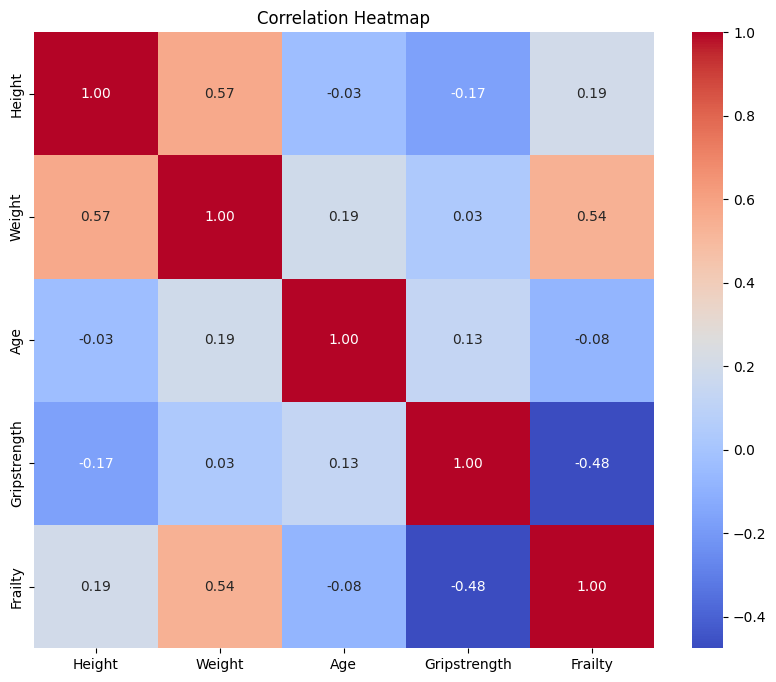

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [23]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from google.colab import output


# Load the cleaned data
df = pd.read_csv('frailty_data_cleaned.csv')

# 1. Scatter Plot: Grip Strength vs. Frailty (Interactive)
fig1 = px.scatter(df, x='Gripstrength', y='Height', color='Frailty',
                  title='Grip Strength vs. Height with Frailty')
fig1.update_layout(xaxis_title='Grip Strength', yaxis_title='Height')
fig1.show()

# 2. Histogram: Distribution of Grip Strength by Frailty (Interactive)
fig2 = px.histogram(df, x='Gripstrength', color='Frailty',
                    title='Distribution of Grip Strength by Frailty',
                    nbins=15, barmode='overlay')
fig2.show()

# 3. Box Plot: Grip Strength by Frailty (Interactive)
fig3 = px.box(df, x='Frailty', y='Gripstrength',
               title='Grip Strength by Frailty')
fig3.show()




# 5. 3D Scatter Plot: Height, Weight, and Grip Strength (Interactive)
fig5 = px.scatter_3d(df, x='Height', y='Weight', z='Gripstrength', color='Frailty',
                     title='3D Scatter Plot: Height, Weight, and Grip Strength')
fig5.show()

# Save the scatter plot
fig1.write_html("grip_strength_vs_height_scatter.html")

# Save the histogram
fig2.write_html("grip_strength_distribution_histogram.html")

# Save the box plot
fig3.write_html("grip_strength_box_plot.html")

# Save the 3D scatter plot
fig5.write_html("height_weight_grip_strength_3d_scatter.html")